In [1]:
#Importing the required Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom, norm, geom

In [2]:
#Importing dataset to a Pandas dataframe
data=pd.read_csv('walmart.csv')

In [3]:
#Checking the data set size
data.shape

#Dataset has 550068 rows x 10 columns

(550068, 10)

In [4]:
#Check first 5 record of DF to understand the data provided
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
#Checking the Dataset datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [3]:
#Convert the columns to categorical dtype wherever applicable
data['City_Category']=data['City_Category'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['Marital_Status']=data['Marital_Status'].astype('category')
data['Age']=data['Age'].astype('category')
data['User_ID']=data['User_ID'].astype('category')
data['Product_ID']=data['Product_ID'].astype('category')
data['Occupation']=data['Occupation'].astype('category')
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('category')
data['Product_Category']=data['Product_Category'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
#Checking how many null entries we have across all the columns
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
#Checking the number of unique values in each columns
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
#checking the value counts of each column to check for any inconsistencies
for i in list(data.columns):
    print("Column" ,i,":")
    print(data[i].value_counts())
    print()

Column User_ID :
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Column Product_ID :
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

Column Gender :
M    414259
F    135809
Name: Gender, dtype: int64

Column Age :
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Column Occupation :
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occu

In [4]:
#Statistical Analysis of Dataset
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [5]:
#Calculating the Inter-Quartile Range for the numeric columns
description=data.describe().loc[['25%','75%']].T
description['IQR']=description['75%']-description['25%']
description['Lower Limit']=description['25%']-1.5*description['IQR']
description['Upper Limit']=description['75%']+1.5*description['IQR']
description

,25%,75%,IQR,Lower Limit,Upper Limit
Purchase,5823.0,12054.0,6231.0,-3523.5,21400.5


In [6]:
#Outlier Treatment. Creating a new column with the outlier values being replaced with the Upper Limit.
#Creating a new column as it will help retain the original values if needed
data.loc[data['Purchase']>description.loc['Purchase','Upper Limit'],'NewPurchase']=description.loc['Purchase','Upper Limit']

#Filling the remaining values with original values
data['NewPurchase'].fillna(data['Purchase'],inplace=True)

In [7]:
data[data['Purchase']!=data['NewPurchase']].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603,21400.5
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792,21400.5
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233,21400.5
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595,21400.5
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341,21400.5


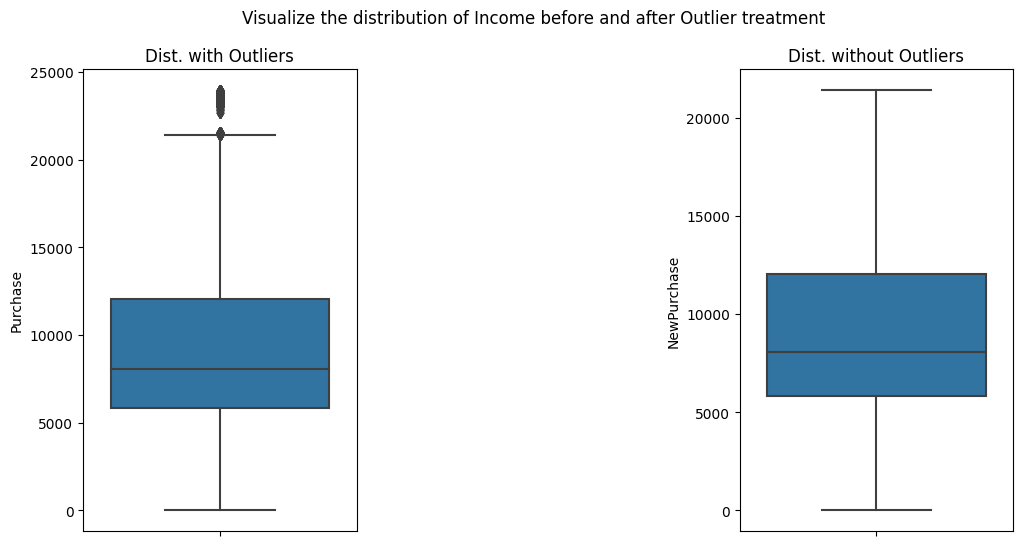

In [15]:
#Visualize the distribution of Income before and after Outlier treatment
plt.figure(figsize=(12,6))
plt.suptitle('Visualize the distribution of Income before and after Outlier treatment')
plt.subplot(1,3,1)
sns.boxplot(y=data['Purchase'])
plt.title('Dist. with Outliers')

plt.subplot(1,3,3)
sns.boxplot(y=data['NewPurchase'])
plt.title('Dist. without Outliers')

plt.show()

# ========== Uni-Variate Analysis ============

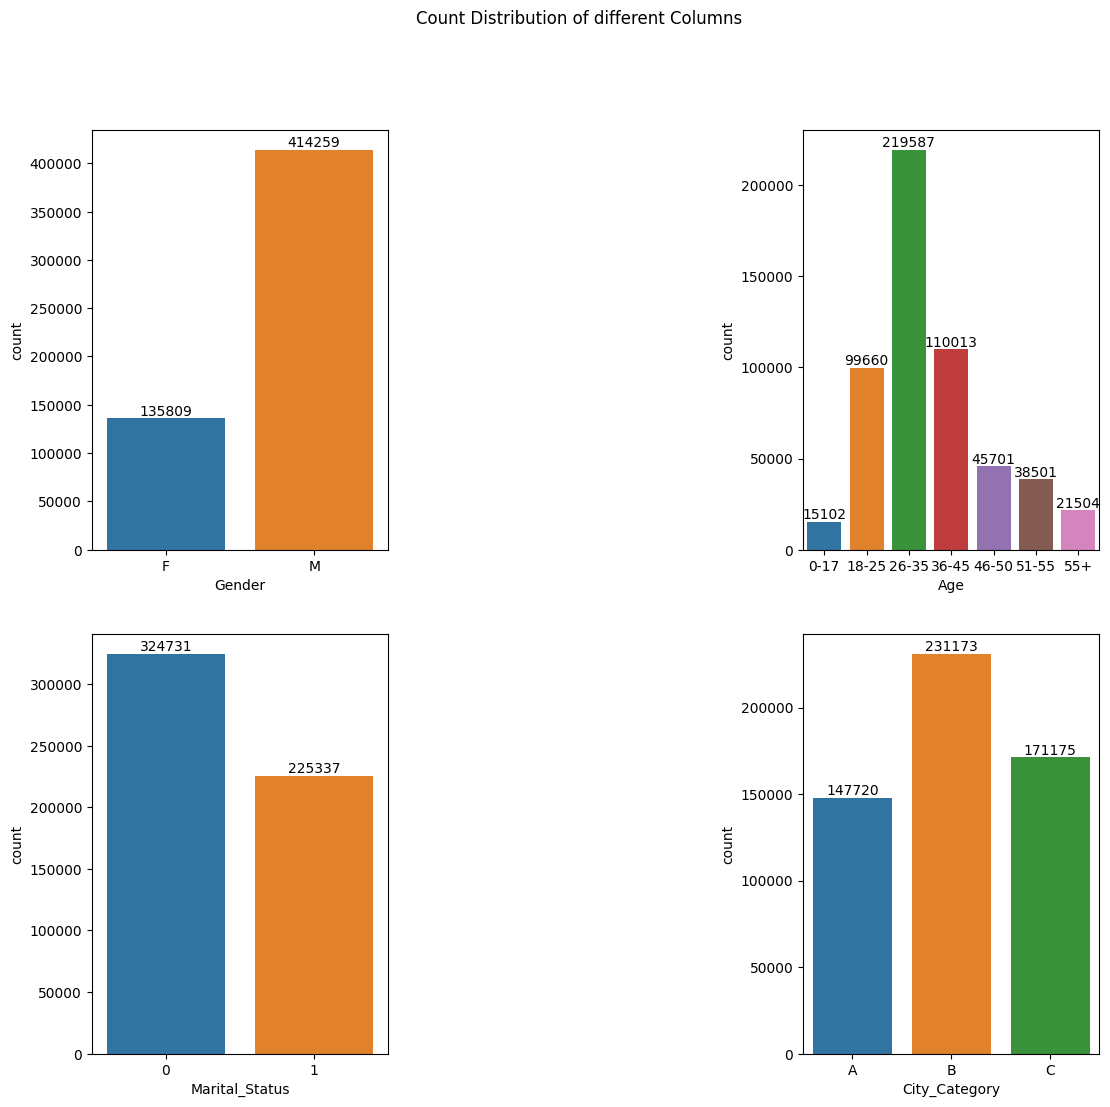

In [44]:
#Uni-variate analysis to Check Count distribution of the values in the columns

cols=['Gender','Age','Marital_Status','City_Category']
k=[1,3,4,6]
i=0
plt.figure(figsize=(13,12))
plt.suptitle('Count Distribution of different Columns')
for col in cols:
    plt.subplot(2,3,k[i])
    a=sns.countplot(x=data[col])
    a.bar_label(a.containers[0])
    i+=1

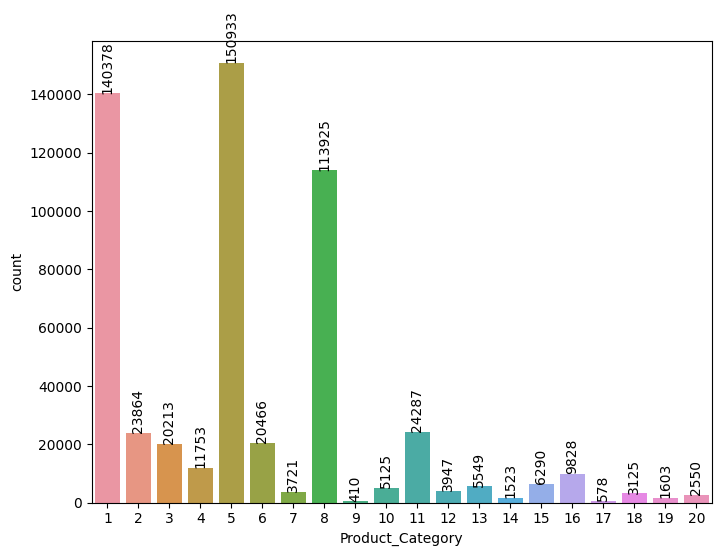

In [39]:
#Count check for Product Category
plt.figure(figsize=(8,6))
a=sns.countplot(x=data['Product_Category'])
a.bar_label(a.containers[0],rotation=90)
plt.show()

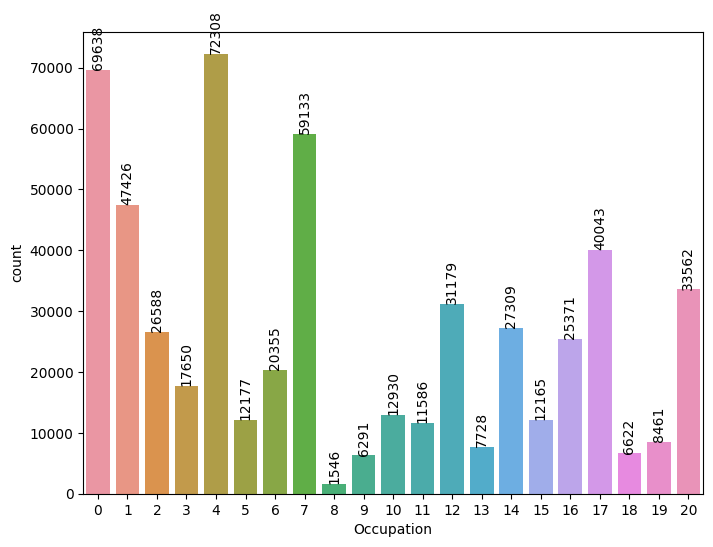

In [40]:
#Count Check for Occupation
plt.figure(figsize=(8,6))
a=sns.countplot(x=data['Occupation'])
a.bar_label(a.containers[0],rotation=90)
plt.show()

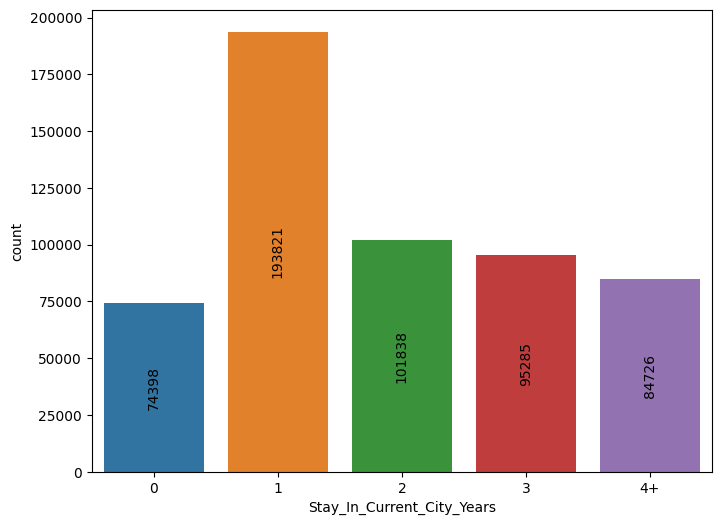

In [16]:
#Count Check for Stay in current city years
plt.figure(figsize=(8,6))
a=sns.countplot(x=data['Stay_In_Current_City_Years'])
a.bar_label(a.containers[0],rotation=90,label_type='center')
plt.show()

In [19]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0


In [22]:
#Checking the distinct count of Male and Female customers in the sample data
female=data.loc[data['Gender']=="F",'User_ID'].drop_duplicates().reset_index(drop=True)
male=data.loc[data['Gender']=="M",'User_ID'].drop_duplicates().reset_index(drop=True)

In [28]:
female.shape

(1666,)

In [29]:
male.shape

(4225,)

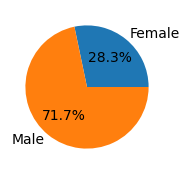

In [31]:
#Checking the gender distribution of the customers
plt.figure(figsize=(4,2))
a=plt.pie([len(female),len(male)],labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

# ========== Bivariate Analysis =======

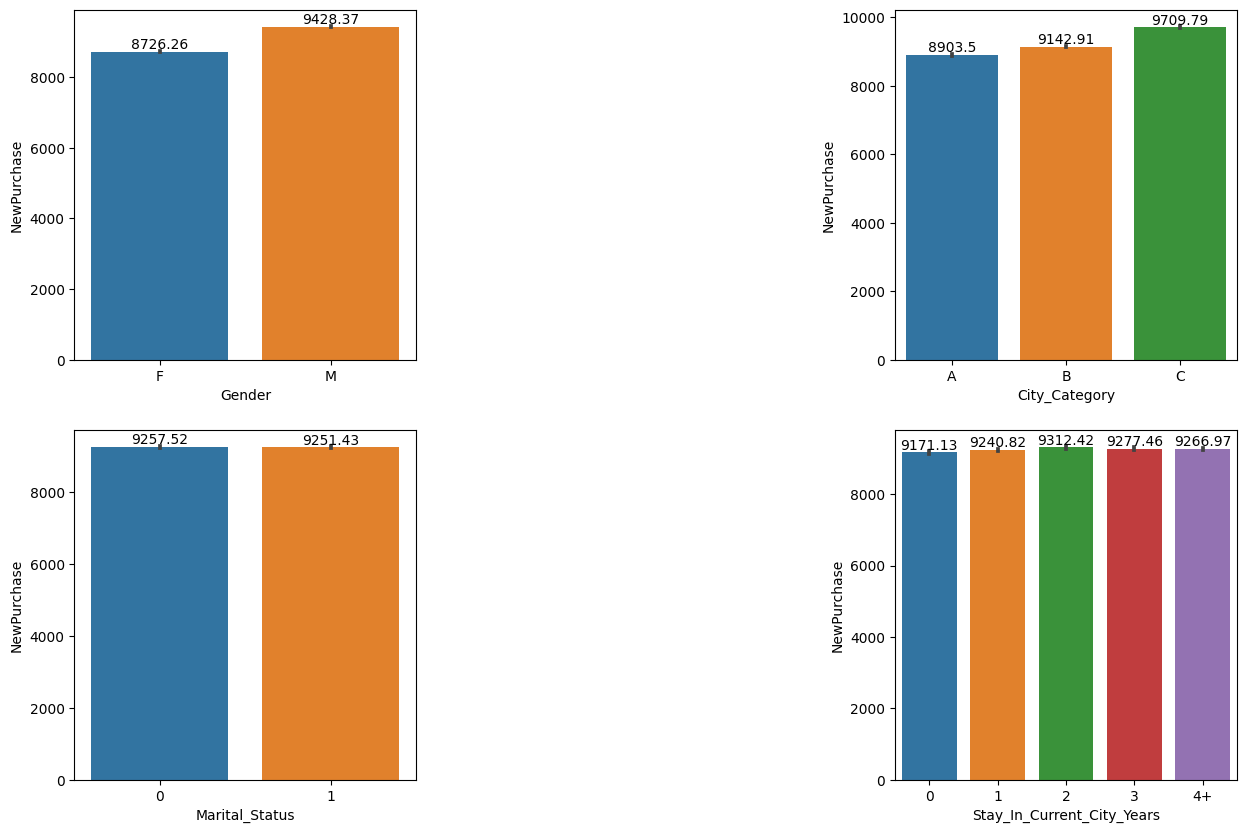

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
a=sns.barplot(data=data, y='NewPurchase',x='Gender',estimator=np.mean)
a.bar_label(a.containers[0])

plt.subplot(2,3,3)
a=sns.barplot(data=data, y='NewPurchase',x='City_Category',estimator=np.mean)
a.bar_label(a.containers[0])

plt.subplot(2,3,4)
a=sns.barplot(data=data, y='NewPurchase',x='Marital_Status',estimator=np.mean)
a.bar_label(a.containers[0])

plt.subplot(2,3,6)
a=sns.barplot(data=data, y='NewPurchase',x='Stay_In_Current_City_Years',estimator=np.mean)
a.bar_label(a.containers[0])
plt.show()

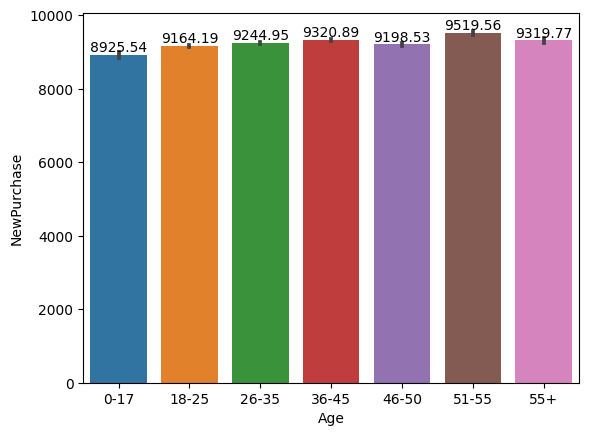

In [37]:
a=sns.barplot(data=data, y='NewPurchase',x='Age',estimator=np.mean)
a.bar_label(a.containers[0])
plt.show()

In [53]:
#Checking the average spending per person per gender Gender for the available dataset 
df=data.groupby(['User_ID','Gender'])[['Purchase']].mean().dropna().sort_values(by='Gender').groupby('Gender')['Purchase'].mean()
df

Gender
F    8965.198464
M    9806.867524
Name: Purchase, dtype: float64